In [1]:
from randoms.data import GenericDataset
from randoms.flows import RealNVP

In [2]:
train_data = GenericDataset('../data/PSM/train.csv')
test_data = GenericDataset('../data/PSM/test.csv')

In [3]:
model = RealNVP(
    n_features = train_data.shape[1],
    n_flows=10,
    layer_width=train_data.shape[1] * 4,
    n_layers=4,
    act_norm=True,
    random_state=42,
    epochs=100
)

In [4]:
model.train(train_data, batch_size=256)

100%|██████████| 100/100 [36:40<00:00, 22.01s/it]


In [5]:
model.loss_hist.max()

52.14469528198242

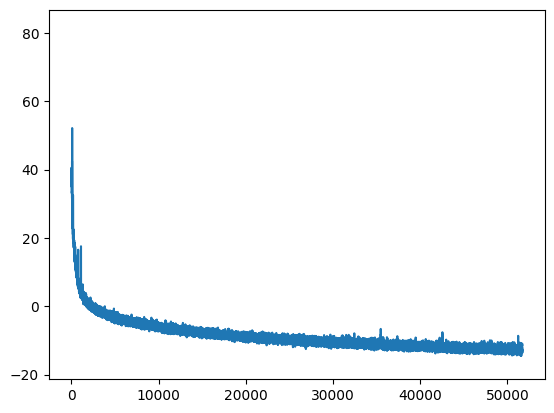

In [6]:
from matplotlib import pyplot as plt

plt.plot(model.loss_hist)
plt.ylim([model.loss_hist[-1]-10, model.loss_hist[0]+50])
plt.show()

In [7]:
a = model._model

In [8]:
import numpy as np

log_p_sum = 0
num_nan = 0
# Move model on GPU if available
enable_cuda = True
device = torch.device('cuda' if torch.cuda.is_available() and enable_cuda else 'cpu')
a = a.to(device)

test_loader = DataLoader(test_data, batch_size=test_data.shape[0], shuffle=True)
for x in iter(test_loader):
    with torch.no_grad():
        x = x.to(device).float()
        log_p = a.log_prob(x)
        log_p_np = log_p.cpu().detach().numpy()
    isfinite = np.isfinite(log_p_np)
    num_nan += np.sum(~isfinite)
    log_p_sum += np.sum(log_p_np[isfinite])
if num_nan < len(test_data):
    log_p_avg = log_p_sum / (len(test_data) - num_nan)
else:
    log_p_avg = np.nan

NameError: name 'torch' is not defined

In [ ]:
log_p_np

array([ -53.359783 ,   -5.1761136,   18.772041 , ..., -143.44695  ,
        -92.60604  ,   44.069473 ], dtype=float32)